Dataset shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6

Cluster distribution:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


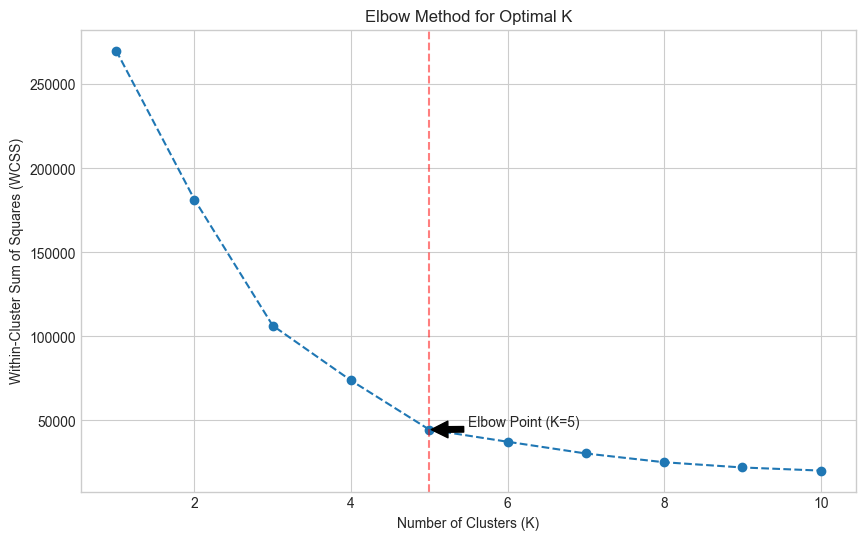

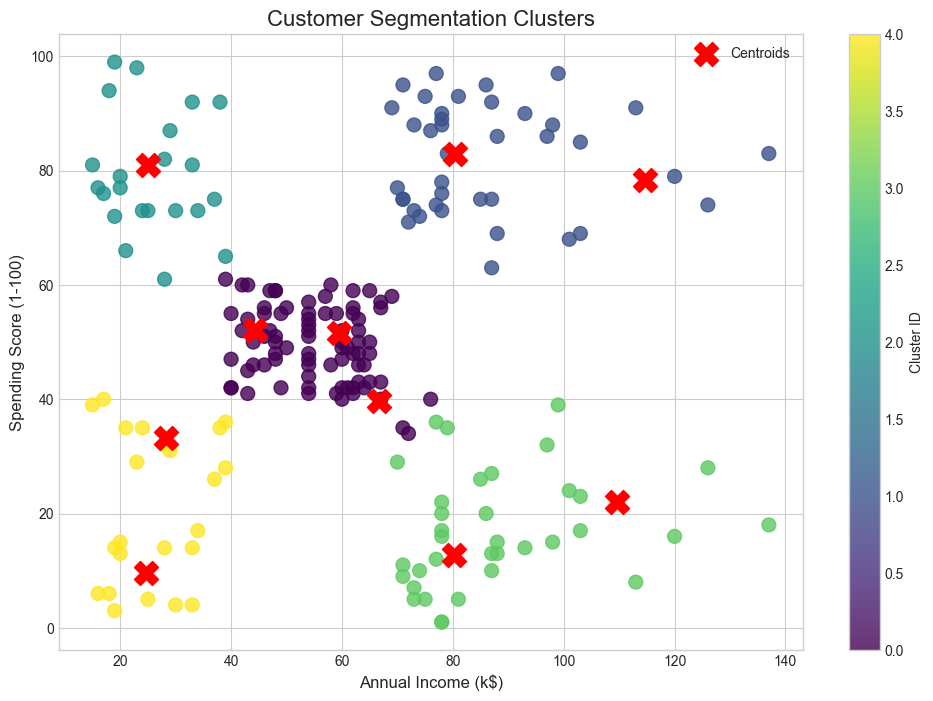

Silhouette Score for K=5: 0.554
Interpretation: Reasonable structure


In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
# Load dataset
df = pd.read_csv("C:/Users/lenov/Downloads/Mall_Customers.csv")
print(f"Dataset shape: {df.shape}")
print(df.head(3))

# Feature selection for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


# Initialize K-Means with 5 clusters (common heuristic)
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# View cluster assignments
print("\nCluster distribution:")
print(df['Cluster'].value_counts())


# Calculate WCSS for K values 1-10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.axvline(x=5, color='r', linestyle='--', alpha=0.5)
plt.annotate('Elbow Point (K=5)', xy=(5, wcss[4]), xytext=(5.5, wcss[4]+2000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


# Plot clusters with centroids
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['Annual Income (k$)'], 
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.8
)

centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], 
    centers[:, 1],
    s=300, 
    c='red',
    marker='X',
    alpha=1,
    label='Centroids'
)

plt.title('Customer Segmentation Clusters', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.colorbar(scatter, label='Cluster ID')
plt.legend()
plt.show()


# Calculate Silhouette Score
score = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score for K=5: {score:.3f}")

# Interpretation
if score > 0.7:
    interpretation = "Strong structure"
elif score > 0.5:
    interpretation = "Reasonable structure"
elif score > 0.25:
    interpretation = "Weak structure"
else:
    interpretation = "No substantial structure"
    
print(f"Interpretation: {interpretation}")